# Lab 2 :

Syftet med den här laborationen är att använda verktygen du lärt dig i Python för att implementera en förenklad maskininlärningsalgoritm.

I den här laborationen finns (simulerad) data på Pichus och Pikachus längder och bredder. Du ska skapa en algoritm som baserat på den givna datan kunna avgöra om en ny data ska klassificeras som Pichu eller Pikachu.

In [23]:
def read_file(filepath):                    #function that reads the content of a file, input is the path of the file
    with open(filepath,"r") as f:
        content= f.read()
    return content                                  # function returns a string

def coordinates_in_file(filepath):                  #function for cleaning the content, input is the file path
    raw_content=repr(read_file(filepath))           # uses the file path to read the content
    unwanted_strings=[" ","'","(",")"]              # list of the unwanted characters and spaces

    for unwanted_string in unwanted_strings :       #looping through the unwanted strings list to clean the text
        raw_content=raw_content.replace(unwanted_string,"")

    clean_content=raw_content.replace(r"\n",",")    #making sure each item in the text is seperated by a ","
    clean_list=clean_content.split(",")             #splitting by at each ","

    list_of_coordinates=[float(item) for item in clean_list if item!="" and item[0].isdigit()]      #creating a list of coordinates only, ignoring empty space and text
    # putting X coordinates and Y coordinates in different lists
    X_axis=[list_of_coordinates[index] for index in range(len(list_of_coordinates)) if index%2==0]  
    Y_axis=[list_of_coordinates[index] for index in range(len(list_of_coordinates)) if index%2!=0]

    coordinates=[X_axis,Y_axis] #gathering both X and Y coordinates in the same list for being returned

    return coordinates #returns a list of 2 lists, index[0] is the list of X coordinates, index [1] is the Y coordinates


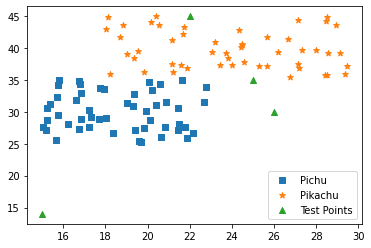

In [24]:
import matplotlib.pyplot as plt

#file paths
path_test_points="files/test_points.txt"
path_pikachu="files/pikachu.txt"
path_pichu="files/pichu.txt"

#reading and cleaning the coordinates of each file
coordinates_pichu = coordinates_in_file(path_pichu)
coordinates_pikachu = coordinates_in_file(path_pikachu)
coordinates_test_points = coordinates_in_file(path_test_points)

#creating 2 lists : width and height, for each file
#pichu file
width_pichu=coordinates_pichu[0]
height_pichu=coordinates_pichu[1]
#pikachu file
width_pikachu=coordinates_pikachu[0]
height_pikachu=coordinates_pikachu[1]
# test points file
width_test_points=coordinates_test_points[0]
height_test_points=coordinates_test_points[1]

#plotting out the results
plt.figure()
plt.scatter(width_pichu,height_pichu,marker="s",label="Pichu")
plt.scatter(width_pikachu,height_pikachu,marker="*",label="Pikachu")
plt.scatter(width_test_points,height_test_points,marker="^",label="Test Points")
plt.legend(loc="lower right")

plt.show()

In [25]:
def distance(A,B):  #function to calculate the euclidian distance, input arguments are 2 lists of 2 floats or integers each.
    return (((A[0]-B[0])**2+(A[1]-B[1])**2)**0.5) #returns a float

# checking the distance between each test point and all pichu and pikachu points
for i,j in zip(width_test_points,height_test_points): 
    all_distances=[]                                        #list that will contain lists of all distances calculated and name of the pokemon in this format [[distance,"Pokemon"],[distance,"Pokemon"],[distance,"pokemon"],..]
    X=[i,j]
    for k,l in zip(width_pichu,height_pichu):
        Y=[k,l]              
        all_distances.append([distance(X,Y),"Pichu"])
    for k,l in zip(width_pikachu,height_pikachu):
        Y=[k,l]
        all_distances.append([distance(X,Y),"Pikachu"])

    all_distances.sort()        #list gets sorted by first items of the inner lists
    print(f"Sample with (width,height) : ({i},{j}) is classified to be {all_distances[0][1]}")  #printing out the name of the pikachu with lowest distance to the test point, then the loop checks the next test point

Sample with (width,height) : (25.0,35.0) is classified to be Pikachu
Sample with (width,height) : (15.0,14.0) is classified to be Pichu
Sample with (width,height) : (26.0,30.0) is classified to be Pichu
Sample with (width,height) : (22.0,45.0) is classified to be Pikachu


- 1. Låt användaren mata in en testpunkt och avgör om den dess klass. Ta med felhanteringen som tar hand om negativa tal och icke-numeriska inputs. Se till att ha användarvänliga felmeddelanden.


In [40]:
def ask_for_number(): # function for asking for a number and trying for errors
    while True:
        try :
            number=float(input("Please enter the width of your pokemon : "))  
            if number==0 :
                raise ValueError(f"Width or height cannot be 0")  
            if number<0:    #checking if number is negative
                raise ValueError(f"Please enter {abs(number)} instead")  
            break   #if number not negative and it could be turned into a float with no error, we break out of the the While loop
        except ValueError as errorrr :
            print(errorrr)
    return number   #returns a float


- 2. Den approachen vi använt med närmaste punkten kan klassificera fel när punkterna för respektive klass går in i varandra. Nu ska du istället välja de fem närmaste punkterna till din testpunkt. Den klass testpunkten tillhör avgörs av majoritetsklassen av de närmaste punkterna.


In [41]:

def finding_the_closest(point,checking):                # function for finding the closest pokemon, arguments are a point (a list of 2 coordinates) and the number of closest points we will be checking
    all_distances=[]
    for i,j,k,l in zip(width_pichu,height_pichu,width_pikachu,height_pikachu):  #comparing the point to both a pikachu and a pichu point at a time
        if distance(point,[i,j])!=0:                                            #checking if we are not already testing a pichu point, would help us at the end while checking the accuracy of each point
            all_distances.append([distance(point,[i,j]),"Pichu"])
        if distance(point,[i,j])!=0:
            all_distances.append([distance(point,[k,l]),"Pikachu"])

    all_distances.sort()                                                        #sorting the distances
    closest_pokemons=[pokemon[1] for pokemon in all_distances[:checking]]       #creating a list of the names of the X closest pokemons, where X is the second argument of the function.                                               
    
    if closest_pokemons.count("Pichu")>checking//2 :                            #checking and returning the closest pokemon
        return("Pichu")
    else:
        return("Pikachu")


X=[ask_for_number() for i in range(2) ]                                         #Getting the coordinates of the point X from the user

print(f"The pokemon you entered is a :  {finding_the_closest(X,5)}")                                                 #printing out the pokemon it can be, based on testing the 5 closest pokemons


Please enter 1.0 instead
Width or height cannot be 0
Please enter 9.0 instead
The pokemon you entered is a :  Pichu



 3. Dela in ursprungsdatan slumpmässigt så att:
- 90 är träningsdata (45 Pikachu, 45 Pichu) 
- 10 är testdata (5 Pikachu, 5 Pichu)

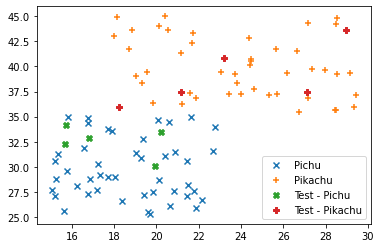

In [13]:
import random as rnd 

# creating random indexes using sample() to avoid getting the same index twice
random_indexes=rnd.sample(range(0,49),5) # https://stackoverflow.com/questions/22842289/generate-n-unique-random-numbers-within-a-range

#creating lists for random test points and training points coordinates for both pokemons
#decided to create new lists instead of just removing the test points from the original list and putting only them in a new one to avoid losing data, since the program would remove 5 more items from the original list everytime we run this part of the code
#width and height of the random points of Pichu
width_random_points_pichu=[width_pichu[i] for i in range (50) if i in random_indexes]
height_random_points_pichu=[height_pichu[i] for i in range (50) if i in random_indexes]
#width and height of the random points of Pikachu
width_random_points_pikachu=[width_pikachu[i] for i in range(50) if i in random_indexes]
height_random_points_pikachu=[height_pikachu[i] for i in range(50) if i in random_indexes]
#width and height of the training points of Pichu
width_training_points_pichu=[width_pichu[i] for i in range(50) if i not in random_indexes]
height_training_points_pichu=[height_pichu[i] for i in range(50) if i not in random_indexes]
#width and height of the training points of Pikachu
width_training_points_pikachu=[width_pikachu[i] for i in range(50) if i not in random_indexes]
height_training_points_pikachu=[height_pikachu[i] for i in range(50) if i not in random_indexes]


plt.figure()
plt.scatter(width_training_points_pichu,height_training_points_pichu, marker="x",label="Pichu")
plt.scatter(width_training_points_pikachu,height_training_points_pikachu,marker="+",label="Pikachu")
plt.scatter(width_random_points_pichu,height_random_points_pichu,marker="X",label="Test - Pichu")
plt.scatter(width_random_points_pikachu,height_random_points_pikachu,marker="P",label="Test - Pikachu")

plt.legend(loc="lower right")
plt.show()

4. Beräkna noggranheten :

In [21]:
#checking the accuracy of figuring out which pokemon the randomly chosen points belong to according to our algorithm
#creating a list for each parameter that will get an item=1 every time the condition is verified
#parameter = sum of the list, means the number of times the condition for that parameter was verified

TP =sum([1 for i,j in zip(width_random_points_pikachu,height_random_points_pikachu) if finding_the_closest([i,j],5)=="Pikachu"])
FP =sum([1 for i,j in zip(width_random_points_pikachu,height_random_points_pikachu) if finding_the_closest([i,j],5)!="Pikachu"])
TN =sum([1 for i,j in zip(width_random_points_pichu,height_random_points_pichu) if finding_the_closest([i,j],5)=="Pichu"])
FN =sum([1 for i,j in zip(width_random_points_pichu,height_random_points_pichu) if finding_the_closest([i,j],5)!="Pichu"])

print(f"TP:{TP} | TN:{TN} | FP:{FP} | FN:{FN}")
print(f"Accuracy for these 5 random numbers = {int(100*(TP+TN)/(TP+FP+TN+FN))}%")

TP:4 | TN:5 | FP:1 | FN:0
Accuracy for these 5 random numbers = 90%


The highest accuracy is 100.0% and it could be reached by testing the 1 closest points


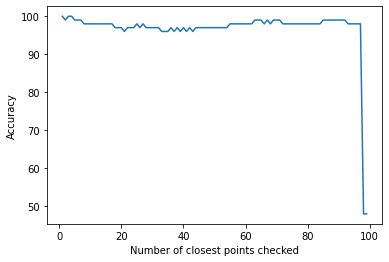

In [26]:
#here we will try different numbers of close points and see which is lowest and fastest way to get the best accuracy.

accuracy = 0                # initializing our variable for storing the final accuracy
accuracies=[]               # here we will store all the accuracies so we can plot them
points_checked=[]           # here we will have all the points checked and we will use them with the accuracies for plotting

for number_points_to_check in range(1,100): #trying for all the possible numbers of closest points
    #adding 1 to the list of True Positives if the point from the list Pikachu is recognized as Pikachu, and so on until filling all the lists of all parameters, then calculating the sum of each
    TP =sum([1 for i,j in zip(width_pikachu,height_pikachu) if finding_the_closest([i,j],number_points_to_check)=="Pikachu"]) 
    FP =sum([1 for i,j in zip(width_pikachu,height_pikachu) if finding_the_closest([i,j],number_points_to_check)!="Pikachu"])
    TN =sum([1 for i,j in zip(width_pichu,height_pichu) if finding_the_closest([i,j],number_points_to_check)=="Pichu"])
    FN =sum([1 for i,j in zip(width_pichu,height_pichu) if finding_the_closest([i,j],number_points_to_check)!="Pichu"])
    
    current_accuracy=100*(TP+TN)/(TP+FP+TN+FN) #accuracy for the TP,TN,FP,FN parameters with the current number of closest points checked

    #finding the best accuracy with minimum number of close points checked and keeping it to print it out when the loop is done
    if accuracy<current_accuracy:
        accuracy=current_accuracy
        lowest_number_point_to_check=number_points_to_check
    
    #saving accuracies with number of points checked to be able to plot the result at the end
    accuracies.append(current_accuracy)
    points_checked.append(number_points_to_check)
    
    
print(f"The highest accuracy is {accuracy}% and it could be reached by testing the {lowest_number_point_to_check} closest points")

plt.figure()
plt.plot(points_checked,accuracies)
plt.xlabel("Number of closest points checked")
plt.ylabel("Accuracy")

plt.show()